# Data Manipulation with Pandas - Part 2

## Mini Project: Sales Performance in Each Branch

Aksara's company needs to analyze sales performance of their branches in the 5 biggest cities in Java. The data to be analyzed are order size, customer count, product count, brand count, and GMV all in a monthly basis. There are four datasets, each for a corresponding quarter in the year 2019.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**1. Read each of the 4 datasets**

In [2]:
retail_data1 = pd.read_csv(
    'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_1_until_3.csv',
    low_memory=False, index_col=0)
retail_data2 = pd.read_csv(
    'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_4_until_6.csv',
    low_memory=False, index_col=0)
retail_data3 = pd.read_csv(
    'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_7_until_9.csv',
    low_memory=False, index_col=0)
retail_data4 = pd.read_csv(
    'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_10_until_12.csv',
    low_memory=False, index_col=0)

**2. Preview and concatenate dataframes**

In [3]:
retail_data1.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price
0,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P0648,BRAND_C,4,1934000,7736000
1,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P3826,BRAND_V,8,604000,4832000
2,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P1508,BRAND_G,12,747000,8964000
3,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P0520,BRAND_B,12,450000,5400000
4,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P1513,BRAND_G,3,1500000,4500000


In [4]:
print(
    f'retail_data1 columns: {retail_data1.columns.values}\n'
    f'retail_data2 columns: {retail_data2.columns.values}\n'
    f'retail_data3 columns: {retail_data3.columns.values}\n'
    f'retail_data4 columns: {retail_data4.columns.values}'
)

retail_data1 columns: ['order_id' 'order_date' 'customer_id' 'city' 'province' 'product_id'
 'brand' 'quantity' 'item_price' 'total_price']
retail_data2 columns: ['order_id' 'order_date' 'customer_id' 'city' 'province' 'product_id'
 'brand' 'quantity' 'item_price' 'total_price']
retail_data3 columns: ['order_id' 'order_date' 'customer_id' 'city' 'province' 'product_id'
 'brand' 'quantity' 'item_price' 'total_price']
retail_data4 columns: ['order_id' 'order_date' 'customer_id' 'city' 'province' 'product_id'
 'brand' 'quantity' 'item_price' 'total_price']


Since all the dataframes have the same columns, they will be concatenated as one.

In [5]:
retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])
print('Number of rows:', retail_table.shape[0])
print('Dataset information:')
retail_table.info()

Number of rows: 508557
Dataset information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 508557 entries, 0 to 201825
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   order_id     508557 non-null  object
 1   order_date   508557 non-null  object
 2   customer_id  508557 non-null  int64 
 3   city         508557 non-null  object
 4   province     508557 non-null  object
 5   product_id   508557 non-null  object
 6   brand        508557 non-null  object
 7   quantity     508557 non-null  int64 
 8   item_price   508557 non-null  int64 
 9   total_price  508557 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 42.7+ MB


In [6]:
print('Statistical summary:')
retail_table.describe()

Statistical summary:


,customer_id,quantity,item_price,total_price
count,508557.000000,508557.000000,5.085570e+05,5.085570e+05
mean,11509.957582,10.571326,1.357347e+06,7.043305e+06
std,6758.489806,112.805119,1.481544e+07,5.135112e+07
min,0.000000,1.000000,-3.871709e+09,-3.871709e+09
25%,12370.000000,1.000000,4.500000e+05,1.356000e+06
50%,14388.000000,4.000000,7.400000e+05,3.498000e+06
75%,16261.000000,11.000000,1.458000e+06,6.270000e+06
max,18287.000000,74215.000000,4.739478e+09,2.790484e+10


**3. Data transformation**

The statistical summary above shows that both `item_price` and `total_price` have negative values. These values don't make sense and will be dropped.

In [7]:
check_neg = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
print('Entries with item_price < 0 or total_price < 0:')
check_neg

Entries with item_price < 0 or total_price < 0:


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price
83664,undefined,2019-09-06,0,unknown,unknown,P0153,BRAND_A,1,-3871709000,-3871709000
83665,undefined,2019-09-06,0,unknown,unknown,P0153,BRAND_A,1,-3871709000,-3871709000


In [8]:
if check_neg.shape[0] != 0:  # Dropping rows with values below zero
    retail_table = retail_table.loc[(retail_table['item_price'] > 0) | (retail_table['total_price'] > 0)]

The statistical summary did not show a description for order_id because there are non-numerical entries 'undefined'. These entries will be dropped.

In [9]:
check_undef = retail_table.loc[retail_table['order_id'] == 'undefined']
check_undef

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price
83663,undefined,2019-09-06,0,unknown,unknown,P0153,BRAND_A,1,3871733000,3871733000


In [10]:
if check_undef.shape[0] != 0:  # Dropping rows with undefined order_id
    retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

Perform some necessary data type conversion, re-check the dataset information and statistical summary.

In [11]:
retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
print('Dataset information:')
retail_table.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 508554 entries, 0 to 201825
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     508554 non-null  int64         
 1   order_date   508554 non-null  datetime64[ns]
 2   customer_id  508554 non-null  int64         
 3   city         508554 non-null  object        
 4   province     508554 non-null  object        
 5   product_id   508554 non-null  object        
 6   brand        508554 non-null  object        
 7   quantity     508554 non-null  int64         
 8   item_price   508554 non-null  int64         
 9   total_price  508554 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 42.7+ MB


A total of three entries were dropped from the original dataframe and each column now has an appropriate data type.

In [12]:
print('Statistical summary:')
retail_table.describe()

Statistical summary:


,order_id,customer_id,quantity,item_price,total_price
count,5.085540e+05,508554.000000,508554.000000,5.085540e+05,5.085540e+05
mean,1.680676e+06,11510.025480,10.571383,1.364968e+06,7.050960e+06
std,3.865433e+04,6758.451924,112.805449,1.144767e+07,5.048185e+07
min,1.612339e+06,0.000000,1.000000,1.200000e+04,1.200000e+04
25%,1.646143e+06,12370.000000,1.000000,4.500000e+05,1.356000e+06
50%,1.682617e+06,14388.000000,4.000000,7.400000e+05,3.498000e+06
75%,1.714960e+06,16261.000000,11.000000,1.458000e+06,6.270000e+06
max,1.742998e+06,18287.000000,74215.000000,4.739478e+09,2.790484e+10


**4. Filter only the entries from 5 largest provinces in Java**

In [13]:
java = ['DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]
retail_table['province'].unique()  # Make sure filtering was successful

array(['DKI Jakarta', 'Jawa Barat', 'Jawa Timur', 'Yogyakarta',
       'Jawa Tengah'], dtype=object)

**5. Group data by `order_date` and `province`, perform aggregation**

In [14]:
groupby_city_province = retail_table.groupby(['order_date','province']).agg({
    'order_id': 'nunique',
    'customer_id': 'nunique',
    'product_id': 'nunique',
    'brand': 'nunique',
    'total_price': sum
})

# Rename the columns
groupby_city_province.columns = ['order', 'customer', 'product', 'brand', 'GMV']
print('groupby_city_province (first 10 rows):')
groupby_city_province.head(10)

groupby_city_province (first 10 rows):


order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     34        33      328     22  4717083000
           Jawa Barat      11         9      136     18  1557289000
           Jawa Tengah      4         4      116     20   352052000
           Jawa Timur       6         6       83     15  1106603000
           Yogyakarta       7         4       88     16  9454007000
2019-01-02 DKI Jakarta     58        50      590     25  6218886000
           Jawa Barat      17        14      246     21  1458207000
           Jawa Tengah      8         7       67     18   968273000
           Jawa Timur       6         6       69     17   901676000
           Yogyakarta      12        12      238     23  1509057000

**6. Unstack to get `order_date` as rows and `province` as columns**

In [15]:
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
print('unstack_city_province (first 5 rows):')
unstack_city_province.head()

unstack_city_province (first 5 rows):


order                                               \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta   
order_date                                                            
2019-01-01        34.0       11.0         4.0        6.0        7.0   
2019-01-02        58.0       17.0         8.0        6.0       12.0   
2019-01-03        43.0       13.0         8.0        8.0       10.0   
2019-01-04        39.0        9.0        11.0        2.0        3.0   
2019-01-06        22.0        9.0         3.0        4.0        2.0   

              customer                                               ...  \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta  ...   
order_date                                                           ...   
2019-01-01        33.0        9.0         4.0        6.0        4.0  ...   
2019-01-02        50.0       14.0         7.0        6.0       12.0  ...   
2019-01-03        40.0       13.0         7.0        6.0        9.0  ...   
2019-01-04        25.0        7.0         9.0        2.0        3.0  ...   
2019-01-06        22.0        9.0         3.0        3.0        2.0  ...   

                 brand                                               \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta   
order_date                                                            
2019-01-01        22.0       18.0        20.0       15.0       16.0   
2019-01-02        25.0       21.0        18.0       17.0       23.0   
2019-01-03        23.0       22.0        18.0       18.0       23.0   
2019-01-04        24.0       18.0        17.0       14.0       19.0   
2019-01-06        25.0       23.0        10.0       19.0       12.0   

                     GMV                                           \
province     DKI Jakarta    Jawa Barat  Jawa Tengah    Jawa Timur   
order_date                                                          
2019-01-01  4.717083e+09  1.557289e+09  352052000.0  1.106603e+09   
2019-01-02  6.218886e+09  1.458207e+09  968273000.0  9.016760e+08   
2019-01-03  4.670172e+09  1.797040e+09  663258000.0  1.189519e+09   
2019-01-04  6.724529e+09  1.805267e+09  710456000.0  2.418780e+08   
2019-01-06  2.483318e+09  1.558771e+09  308975000.0  2.157180e+08   

                          
province      Yogyakarta  
order_date                
2019-01-01  9.454007e+09  
2019-01-02  1.509057e+09  
2019-01-03  1.582902e+09  
2019-01-04  5.945680e+08  
2019-01-06  1.221680e+08  

[5 rows x 25 columns]

**7. Slice data for each measurement, e.g., by `order`**

In [16]:
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:, idx['order']]
print('by order (first 5 rows):')
by_order.head()

by order (first 5 rows):


province,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur,Yogyakarta
order_date,,,,,
2019-01-01,34.0,11.0,4.0,6.0,7.0
2019-01-02,58.0,17.0,8.0,6.0,12.0
2019-01-03,43.0,13.0,8.0,8.0,10.0
2019-01-04,39.0,9.0,11.0,2.0,3.0
2019-01-06,22.0,9.0,3.0,4.0,2.0


**8. Do a resampling on the data to calculate monthly average**

In [17]:
by_order_monthly_mean = by_order.resample('M').mean()
print('by_order_monthly_mean:')
by_order_monthly_mean

by_order_monthly_mean:


province,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur,Yogyakarta
order_date,,,,,
2019-01-31,27.222222,10.500000,5.111111,3.500000,4.555556
2019-02-28,19.083333,7.458333,3.250000,3.208333,2.833333
2019-03-31,18.576923,6.615385,3.615385,3.192308,3.038462
2019-04-30,22.923077,8.000000,4.038462,3.730769,3.807692
2019-05-31,27.318182,9.181818,4.318182,5.181818,5.000000
2019-06-30,28.333333,9.375000,5.291667,4.833333,4.125000
2019-07-31,25.407407,8.444444,4.185185,4.407407,3.740741
2019-08-31,25.076923,7.923077,4.307692,4.269231,3.846154
2019-09-30,22.040000,8.640000,5.160000,3.120000,3.920000


**9. Plot the results**

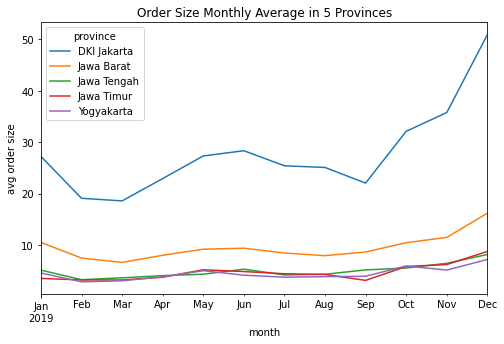

In [18]:
by_order_monthly_mean.plot(
    figsize = (8,5),
    title = 'Order Size Monthly Average in 5 Provinces'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

Plot the monthly average for other measurements.

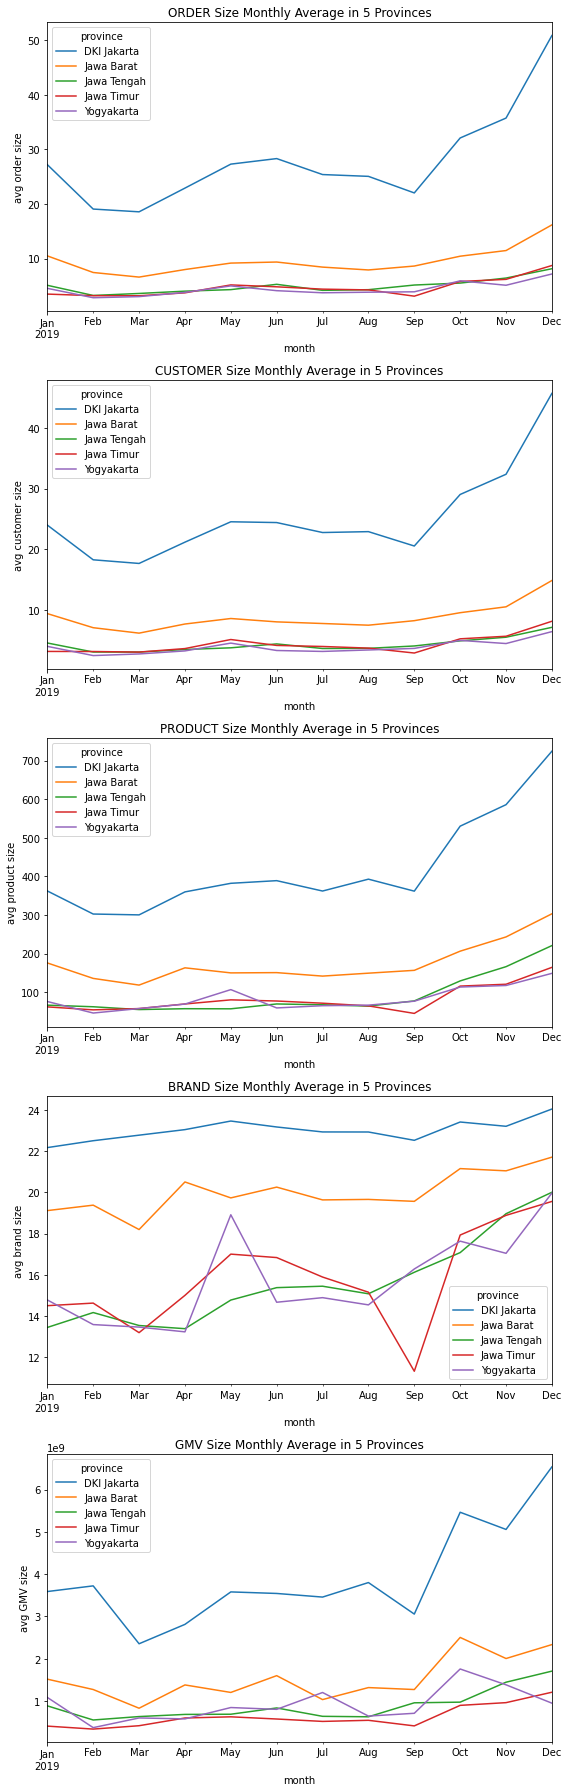

In [19]:
fig, axes = plt.subplots(5, 1, figsize=(8, 25))
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    by_measurement = unstack_city_province.loc[:, idx[measurement]]
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    by_measurement_monthly_mean.plot(
        title = measurement.upper() + ' Size Monthly Average in 5 Provinces',
        ax = axes[i])
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')
plt.tight_layout()
plt.show()

Compared to other branches, the DKI Jakarta branch achieved highest performance by a large margin in every measurement.